In [42]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

# plotting 환경 설정
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [4]:
vod_paper_score = pd.read_csv('../data/전처리data/vod_paper_score.csv')
vod_paper_score

,subsr,series_nm,vod_id,score,ct_cl,genre_of_ct_cl,category
0,59879000,소방서 옆 경찰서,2092,0.244476,TV드라마,기타,TV프로그램
1,59879000,신성한 이혼,1190,0.738281,TV드라마,기타,TV프로그램
2,59895000,금이야 옥이야,784,1.000000,TV드라마,기타,TV프로그램
3,59900000,2022 역사저널 그날,572,0.215482,TV 시사/교양,기타,TV프로그램
4,59900000,그것이알고싶다,297,0.374741,TV 시사/교양,기타,TV프로그램
...,...,...,...,...,...,...,...
1496,67140000,경남 통영 2부,4396,0.292893,우리동네,연예/오락,TV프로그램
1497,67140000,밀수,2865,0.250000,영화,액션/어드벤쳐,영화
1498,67140000,잠자는 숲속의 공주,689,0.292893,키즈,기타,키즈
1499,67148000,타요의 씽씽극장 동요2,880,0.988951,키즈,기타,키즈


In [7]:
vod_paper_score = vod_paper_score[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'score']]
vod_paper_score

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,score
0,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.244476
1,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.738281
2,59895000,금이야 옥이야,784,TV드라마,기타,TV프로그램,1.000000
3,59900000,2022 역사저널 그날,572,TV 시사/교양,기타,TV프로그램,0.215482
4,59900000,그것이알고싶다,297,TV 시사/교양,기타,TV프로그램,0.374741
...,...,...,...,...,...,...,...
1496,67140000,경남 통영 2부,4396,우리동네,연예/오락,TV프로그램,0.292893
1497,67140000,밀수,2865,영화,액션/어드벤쳐,영화,0.250000
1498,67140000,잠자는 숲속의 공주,689,키즈,기타,키즈,0.292893
1499,67148000,타요의 씽씽극장 동요2,880,키즈,기타,키즈,0.988951


# 2. click_del_score : 클릭률 * 삭제

In [9]:
# vod에만 있는 subsr
filtered = pd.read_csv('../data/전처리data/filtered_rows.csv')
filtered.head()

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,66424000,(HD)나 혼자산다 505회(23/07/28),TV 연예/오락,기타,1452,네가 알던 내가 아냐 편. 무지개 회원들의 반전 가득한 하루! 쇼 음악중심 스페셜 ...,"전현무,기안84,박나래,키,코드쿤스트",1:32,20230831182001
1,66620000,(HD)런닝맨 665회(23/07/30),TV 연예/오락,기타,900,여름방학 편 - 런닝맨이 또 떴다. 4주간 진행되는 런떴 여름방학 프로젝트! 패밀리...,"유재석,지석진,김종국,하하,송지효,양세찬,전소민",1:33,20230828111319
2,66620000,(HD)런닝맨 664회(23/07/23),TV 연예/오락,기타,5520,유재석의 문화유산답사기. 수학여행 감성 가득한 추억 흠뻑 여행! 시간 체크는 필수!...,"유재석,지석진,김종국,하하,송지효,양세찬,전소민",1:32,20230828093843
3,63665000,내 딸 금사월 47회,TV드라마,기타,3481,기황과 세훈은 혜상을 오월이 사고의 범인으로 확신하고 사고 현장으로 데려간다. 사월...,"백진희,윤현민,박세영,도상우,전인화,손창민,박상원,도지원",1:04,20230829182202
4,66875000,내 눈에 콩깍지(KBS) 90회(23/02/06),TV드라마,기타,1279,원섭을 집으로 초대한 장 회장과 이재는 형편이 어려워 세준을 따로 만나 부탁을 한 ...,"백성현,배누리,최윤라,정수환",0:28,20230818132444


In [10]:
#  vod에만 있는 subsr 확인
matching_rows = vod_paper_score[vod_paper_score['subsr'].isin(filtered['subsr'])]
matching_rows

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,score
106,60463000,우리 집에는 사자가 있어,690,키즈,기타,키즈,0.500000
107,60463000,잠자는 숲속의 공주,689,키즈,기타,키즈,0.292893
108,60463000,우락부락 염소 삼 형제,697,키즈,기타,키즈,0.292893
109,60463000,잭과 콩나무,698,키즈,기타,키즈,0.292893
110,60463000,행복한 왕자,695,키즈,기타,키즈,0.292893
...,...,...,...,...,...,...,...
1439,66875000,병리호,2873,TV드라마,외화 시리즈,TV프로그램,0.292893
1440,66875000,벽혈검 1985,1131,TV드라마,외화 시리즈,TV프로그램,0.658579
1441,66875000,밀레니얼스,3879,TV드라마,외화 시리즈,TV프로그램,0.292893
1442,66875000,무림유협기,887,TV드라마,외화 시리즈,TV프로그램,0.636053


In [12]:
# vod에만 있는 subsr 삭제
del_filtered = vod_paper_score[~vod_paper_score['subsr'].isin(filtered['subsr'])]
del_filtered = del_filtered[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'score']]
del_filtered

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,score
0,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.244476
1,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.738281
2,59895000,금이야 옥이야,784,TV드라마,기타,TV프로그램,1.000000
3,59900000,2022 역사저널 그날,572,TV 시사/교양,기타,TV프로그램,0.215482
4,59900000,그것이알고싶다,297,TV 시사/교양,기타,TV프로그램,0.374741
...,...,...,...,...,...,...,...
1496,67140000,경남 통영 2부,4396,우리동네,연예/오락,TV프로그램,0.292893
1497,67140000,밀수,2865,영화,액션/어드벤쳐,영화,0.250000
1498,67140000,잠자는 숲속의 공주,689,키즈,기타,키즈,0.292893
1499,67148000,타요의 씽씽극장 동요2,880,키즈,기타,키즈,0.988951


In [16]:
# click score
click = pd.read_csv('../data/전처리data/click.csv', encoding='cp949')
click

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,Category,c_score
0,65968000,핑크퐁 동물 동요,882,키즈,기타,키즈,1.000000
1,63086000,지니강이 플러스 시즌7,1622,키즈,기타,키즈,0.012195
2,63086000,지니강이 플러스 시즌9,2043,키즈,기타,키즈,0.006098
3,62733000,엘리가간다 시즌12,1958,키즈,기타,키즈,0.500000
4,63086000,지니강이 플러스 시즌8,1596,키즈,기타,키즈,0.012195
...,...,...,...,...,...,...,...
7352,64982000,포켓몬스터 XY and Z,2918,키즈,애니메이션,키즈,0.014493
7353,66864000,포켓몬스터 썬 앤 문 3,3135,키즈,애니메이션,키즈,0.045455
7354,59917000,라바 인 뉴욕,10,키즈,오락,키즈,0.500000
7355,63086000,사이틴 시즌1,3468,키즈,학습,키즈,0.006098


In [18]:
click.rename(columns={'Category': 'category'}, inplace =True)
click_del_sum = pd.merge(click, del_filtered, on=['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category'], how='left')
click_del_sum

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score
0,65968000,핑크퐁 동물 동요,882,키즈,기타,키즈,1.000000,NaN
1,63086000,지니강이 플러스 시즌7,1622,키즈,기타,키즈,0.012195,0.250000
2,63086000,지니강이 플러스 시즌9,2043,키즈,기타,키즈,0.006098,0.292893
3,62733000,엘리가간다 시즌12,1958,키즈,기타,키즈,0.500000,NaN
4,63086000,지니강이 플러스 시즌8,1596,키즈,기타,키즈,0.012195,0.292893
...,...,...,...,...,...,...,...,...
7352,64982000,포켓몬스터 XY and Z,2918,키즈,애니메이션,키즈,0.014493,NaN
7353,66864000,포켓몬스터 썬 앤 문 3,3135,키즈,애니메이션,키즈,0.045455,NaN
7354,59917000,라바 인 뉴욕,10,키즈,오락,키즈,0.500000,NaN
7355,63086000,사이틴 시즌1,3468,키즈,학습,키즈,0.006098,NaN


In [19]:
click_del_sum[click_del_sum['c_score'].isna()]

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score


In [20]:
import numpy as np
# cd_score 컬럼 생성
click_del_sum['cd_score'] = np.where(~click_del_sum['score'].isna(),
                                     click_del_sum['c_score'] * 0.5 + click_del_sum['score'] * 0.5,
                                     click_del_sum['c_score'])
click_del_sum

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score,cd_score
0,65968000,핑크퐁 동물 동요,882,키즈,기타,키즈,1.000000,NaN,1.000000
1,63086000,지니강이 플러스 시즌7,1622,키즈,기타,키즈,0.012195,0.250000,0.131098
2,63086000,지니강이 플러스 시즌9,2043,키즈,기타,키즈,0.006098,0.292893,0.149495
3,62733000,엘리가간다 시즌12,1958,키즈,기타,키즈,0.500000,NaN,0.500000
4,63086000,지니강이 플러스 시즌8,1596,키즈,기타,키즈,0.012195,0.292893,0.152544
...,...,...,...,...,...,...,...,...,...
7352,64982000,포켓몬스터 XY and Z,2918,키즈,애니메이션,키즈,0.014493,NaN,0.014493
7353,66864000,포켓몬스터 썬 앤 문 3,3135,키즈,애니메이션,키즈,0.045455,NaN,0.045455
7354,59917000,라바 인 뉴욕,10,키즈,오락,키즈,0.500000,NaN,0.500000
7355,63086000,사이틴 시즌1,3468,키즈,학습,키즈,0.006098,NaN,0.006098


In [21]:
click_del_sum[click_del_sum['cd_score'].isna()]

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score,cd_score


In [22]:
click_del_score = click_del_sum[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'cd_score']]
click_del_score

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,cd_score
0,65968000,핑크퐁 동물 동요,882,키즈,기타,키즈,1.000000
1,63086000,지니강이 플러스 시즌7,1622,키즈,기타,키즈,0.131098
2,63086000,지니강이 플러스 시즌9,2043,키즈,기타,키즈,0.149495
3,62733000,엘리가간다 시즌12,1958,키즈,기타,키즈,0.500000
4,63086000,지니강이 플러스 시즌8,1596,키즈,기타,키즈,0.152544
...,...,...,...,...,...,...,...
7352,64982000,포켓몬스터 XY and Z,2918,키즈,애니메이션,키즈,0.014493
7353,66864000,포켓몬스터 썬 앤 문 3,3135,키즈,애니메이션,키즈,0.045455
7354,59917000,라바 인 뉴욕,10,키즈,오락,키즈,0.500000
7355,63086000,사이틴 시즌1,3468,키즈,학습,키즈,0.006098


In [27]:
click_del_score.to_csv('../data/전처리data/click_del_score.csv', encoding='cp949', index=0)

# 3. click_plus_score

In [28]:
# vod에만 있는 user 추가한 data 
click_plus = pd.read_csv('../data/전처리data/click_plus.csv', encoding='cp949')
click_plus

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score
0,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.111111
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.333333
2,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.111111
3,59879000,나의 해방일지,1859,TV드라마,기타,TV프로그램,0.111111
4,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.111111
...,...,...,...,...,...,...,...
7553,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.125000
7554,67160000,비공식작전,2057,영화,드라마,영화,0.125000
7555,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,1.000000
7556,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,영화,액션/어드벤쳐,영화,0.250000


In [32]:
click_plus_sum = pd.merge(click_plus, vod_paper_score, on=['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category'], how='left')
click_plus_sum

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score
0,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.111111,NaN
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.333333,0.244476
2,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.111111,0.738281
3,59879000,나의 해방일지,1859,TV드라마,기타,TV프로그램,0.111111,NaN
4,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.111111,NaN
...,...,...,...,...,...,...,...,...
7553,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.125000,NaN
7554,67160000,비공식작전,2057,영화,드라마,영화,0.125000,NaN
7555,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,1.000000,NaN
7556,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,영화,액션/어드벤쳐,영화,0.250000,NaN


In [36]:
# cd_score 컬럼 생성
click_plus_sum['cp_score'] = np.where(~click_plus_sum['score'].isna(),
                                     click_plus_sum['c_score'] * 0.5 + click_plus_sum['score'] * 0.5,
                                     click_plus_sum['c_score'])
click_plus_sum

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score,cp_score
0,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.111111,NaN,0.111111
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.333333,0.244476,0.288905
2,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.111111,0.738281,0.424696
3,59879000,나의 해방일지,1859,TV드라마,기타,TV프로그램,0.111111,NaN,0.111111
4,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.111111,NaN,0.111111
...,...,...,...,...,...,...,...,...,...
7553,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.125000,NaN,0.125000
7554,67160000,비공식작전,2057,영화,드라마,영화,0.125000,NaN,0.125000
7555,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,1.000000,NaN,1.000000
7556,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,영화,액션/어드벤쳐,영화,0.250000,NaN,0.250000


In [37]:
click_plus_sum[click_plus_sum['cp_score'].isna()]

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,c_score,score,cp_score


In [44]:
click_plus_sum = click_plus_sum[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'cp_score']]
click_plus_sum

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,cp_score
0,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.111111
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.288905
2,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.424696
3,59879000,나의 해방일지,1859,TV드라마,기타,TV프로그램,0.111111
4,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.111111
...,...,...,...,...,...,...,...
7553,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.125000
7554,67160000,비공식작전,2057,영화,드라마,영화,0.125000
7555,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,1.000000
7556,67164000,미션 임파서블: 데드 레코닝 PART ONE,2867,영화,액션/어드벤쳐,영화,0.250000


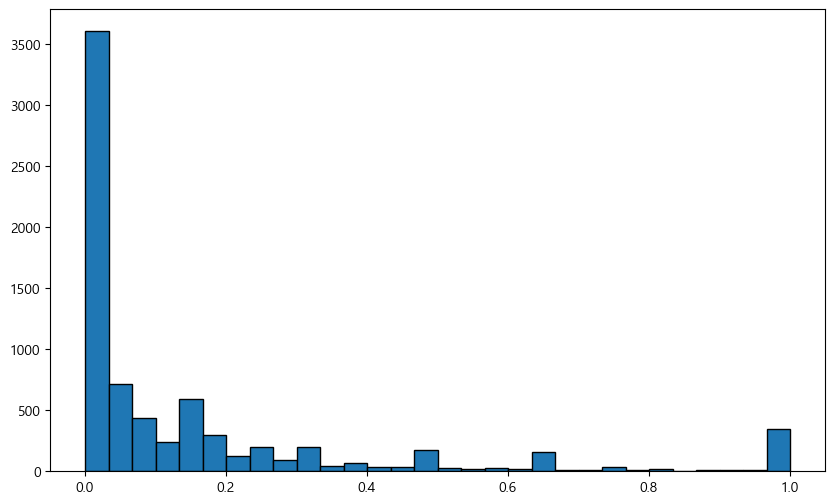

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(click_plus_sum['cp_score'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.show()

In [45]:
click_plus_sum.to_csv('../data/전처리data/click_plus_score.csv', encoding='cp949', index=0)

# 4. paper_del_score

In [59]:
# vod에만 있는 subsr 삭제
del_filtered.head(3)

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,score
0,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.244476
1,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.738281
2,59895000,금이야 옥이야,784,TV드라마,기타,TV프로그램,1.000000


In [60]:
content_paper_s = pd.read_csv('../data/전처리data/content_paper_score.csv', encoding='cp949')
content_paper_s.head(1)

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category
0,59879000,나쁜엄마,3403,0.1875,TV드라마,기타,TV프로그램


In [61]:
# 병합
paper_del_score  = pd.merge(content_paper_s, del_filtered, on=['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category'], how='left')
paper_del_score.head(2)

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category,score
0,59879000,나쁜엄마,3403,0.18750,TV드라마,기타,TV프로그램,NaN
1,59879000,소방서 옆 경찰서,2092,0.11111,TV드라마,기타,TV프로그램,0.244476


In [64]:
# pd_score 계산
paper_del_score['pd_score'] = np.where(~paper_del_score['score'].isna(),
                                     paper_del_score['cpaper_score'] * 0.5 + paper_del_score['score'] * 0.5,
                                     paper_del_score['cpaper_score'])
paper_del_score

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category,score,pd_score
0,59879000,나쁜엄마,3403,0.187500,TV드라마,기타,TV프로그램,NaN,0.187500
1,59879000,소방서 옆 경찰서,2092,0.177793,TV드라마,기타,TV프로그램,0.244476,0.211134
2,59879000,낭만닥터 김사부2,1168,0.106201,TV드라마,기타,TV프로그램,NaN,0.106201
3,59879000,소방서 옆 경찰서,2092,0.233348,TV드라마,기타,TV프로그램,0.244476,0.238912
4,59879000,신성한 이혼,1190,0.442057,TV드라마,기타,TV프로그램,0.738281,0.590169
...,...,...,...,...,...,...,...,...,...
9485,67160000,콘크리트 유토피아,2630,0.125000,영화,드라마,영화,NaN,0.125000
9486,67160000,스파이더맨: 어크로스 더 유니버스,2147,0.124989,영화,애니메이션,영화,NaN,0.124989
9487,67160000,메가로돈 2,4018,0.125000,영화,액션/어드벤쳐,영화,NaN,0.125000
9488,67161000,스파이 코드명 포춘,3824,0.999989,영화,액션/어드벤쳐,영화,NaN,0.999989


In [65]:
paper_del_score[paper_del_score['pd_score'].isna()]

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category,score,pd_score


In [67]:
paper_del_score = paper_del_score[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'pd_score']]
paper_del_score

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,pd_score
0,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.187500
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.211134
2,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.106201
3,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.238912
4,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.590169
...,...,...,...,...,...,...,...
9485,67160000,콘크리트 유토피아,2630,영화,드라마,영화,0.125000
9486,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.124989
9487,67160000,메가로돈 2,4018,영화,액션/어드벤쳐,영화,0.125000
9488,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,0.999989


In [68]:
paper_del_score.to_csv('../data/전처리data/paper_del_score.csv', encoding='cp949', index=0)

# 5. paper_plus_score 

In [71]:
paper_plus = pd.read_csv('../data/전처리data/paper_plus.csv', encoding='cp949')
paper_plus

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category
0,59879000,나쁜엄마,3403,0.187500,TV드라마,기타,TV프로그램
1,59879000,소방서 옆 경찰서,2092,0.111110,TV드라마,기타,TV프로그램
2,59879000,낭만닥터 김사부2,1168,0.106201,TV드라마,기타,TV프로그램
3,59879000,소방서 옆 경찰서,2092,0.222220,TV드라마,기타,TV프로그램
4,59879000,신성한 이혼,1190,0.145833,TV드라마,기타,TV프로그램
...,...,...,...,...,...,...,...
9686,67160000,스파이더맨: 어크로스 더 유니버스,2147,0.124989,영화,애니메이션,영화
9687,67160000,메가로돈 2,4018,0.125000,영화,액션/어드벤쳐,영화
9688,67160000,바비,3523,0.124998,영화,코미디,영화
9689,67161000,스파이 코드명 포춘,3824,0.999989,영화,액션/어드벤쳐,영화


In [72]:
paper_plus_score  = pd.merge(paper_plus, vod_paper_score, on=['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category'], how='left')
paper_plus_score 

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category,score
0,59879000,나쁜엄마,3403,0.187500,TV드라마,기타,TV프로그램,NaN
1,59879000,소방서 옆 경찰서,2092,0.111110,TV드라마,기타,TV프로그램,0.244476
2,59879000,낭만닥터 김사부2,1168,0.106201,TV드라마,기타,TV프로그램,NaN
3,59879000,소방서 옆 경찰서,2092,0.222220,TV드라마,기타,TV프로그램,0.244476
4,59879000,신성한 이혼,1190,0.145833,TV드라마,기타,TV프로그램,0.738281
...,...,...,...,...,...,...,...,...
9686,67160000,스파이더맨: 어크로스 더 유니버스,2147,0.124989,영화,애니메이션,영화,NaN
9687,67160000,메가로돈 2,4018,0.125000,영화,액션/어드벤쳐,영화,NaN
9688,67160000,바비,3523,0.124998,영화,코미디,영화,NaN
9689,67161000,스파이 코드명 포춘,3824,0.999989,영화,액션/어드벤쳐,영화,NaN


In [74]:
# cd_score 컬럼 생성
paper_plus_score['pp_score'] = np.where(~paper_plus_score['score'].isna(),
                                     paper_plus_score['cpaper_score'] * 0.5 + paper_plus_score['score'] * 0.5,
                                     paper_plus_score['cpaper_score'])
paper_plus_score

,subsr,series_nm,vod_id,cpaper_score,ct_cl,genre_of_ct_cl,category,score,pp_score
0,59879000,나쁜엄마,3403,0.187500,TV드라마,기타,TV프로그램,NaN,0.187500
1,59879000,소방서 옆 경찰서,2092,0.177793,TV드라마,기타,TV프로그램,0.244476,0.211134
2,59879000,낭만닥터 김사부2,1168,0.106201,TV드라마,기타,TV프로그램,NaN,0.106201
3,59879000,소방서 옆 경찰서,2092,0.233348,TV드라마,기타,TV프로그램,0.244476,0.238912
4,59879000,신성한 이혼,1190,0.442057,TV드라마,기타,TV프로그램,0.738281,0.590169
...,...,...,...,...,...,...,...,...,...
9686,67160000,스파이더맨: 어크로스 더 유니버스,2147,0.124989,영화,애니메이션,영화,NaN,0.124989
9687,67160000,메가로돈 2,4018,0.125000,영화,액션/어드벤쳐,영화,NaN,0.125000
9688,67160000,바비,3523,0.124998,영화,코미디,영화,NaN,0.124998
9689,67161000,스파이 코드명 포춘,3824,0.999989,영화,액션/어드벤쳐,영화,NaN,0.999989


In [75]:
paper_plus_score = paper_plus_score[['subsr', 'series_nm', 'vod_id', 'ct_cl', 'genre_of_ct_cl', 'category', 'pp_score']]
paper_plus_score

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,pp_score
0,59879000,나쁜엄마,3403,TV드라마,기타,TV프로그램,0.187500
1,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.211134
2,59879000,낭만닥터 김사부2,1168,TV드라마,기타,TV프로그램,0.106201
3,59879000,소방서 옆 경찰서,2092,TV드라마,기타,TV프로그램,0.238912
4,59879000,신성한 이혼,1190,TV드라마,기타,TV프로그램,0.590169
...,...,...,...,...,...,...,...
9686,67160000,스파이더맨: 어크로스 더 유니버스,2147,영화,애니메이션,영화,0.124989
9687,67160000,메가로돈 2,4018,영화,액션/어드벤쳐,영화,0.125000
9688,67160000,바비,3523,영화,코미디,영화,0.124998
9689,67161000,스파이 코드명 포춘,3824,영화,액션/어드벤쳐,영화,0.999989


In [76]:
paper_plus_score[paper_plus_score['pp_score'].isna()]

,subsr,series_nm,vod_id,ct_cl,genre_of_ct_cl,category,pp_score


In [77]:
paper_plus_score.to_csv('../data/전처리data/paper_plus_score.csv', encoding='cp949', index=0)